In [1]:
from mass_regression.visualization.higgs_visualization import Plotter
import pandas as pd
import plotly.express as px
from pathlib import Path

In [2]:
out_path = Path('/global/cscratch1/sd/schuya/mass_regression/pred/higgs/higgs_mixed_all')
events_path = out_path / 'events.pkl'

In [4]:
events = pd.read_pickle(events_path)
plotter = Plotter(events_path)

In [5]:
for particle in ('Wa', 'Wb', 'H'):
    for h_mass in (400, 750, 1000, 1500):
        hm_events = plotter.events[plotter.events['H_Mass'] == h_mass]
        fig = plotter.error_plot(hm_events, particle=particle, feature='m')
        fig_path = out_path / f'diff_{particle}m_hm_{h_mass}.png'
        fig.write_image(str(fig_path))

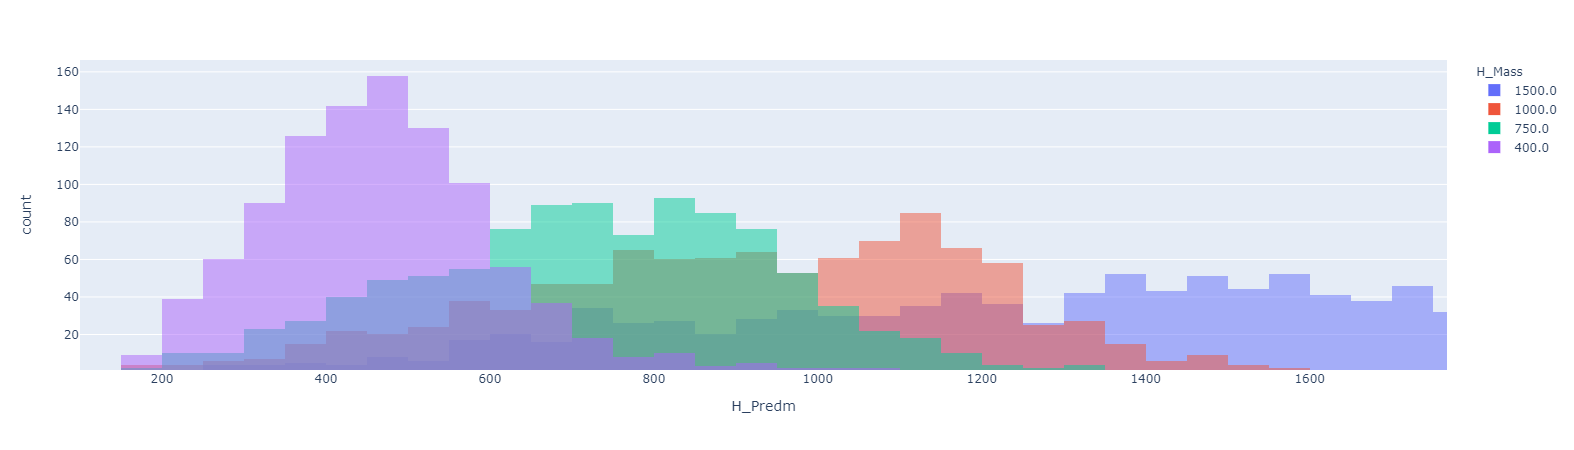

In [3]:
px.histogram(events, x='H_Predm', color='H_Mass', barmode='overlay')

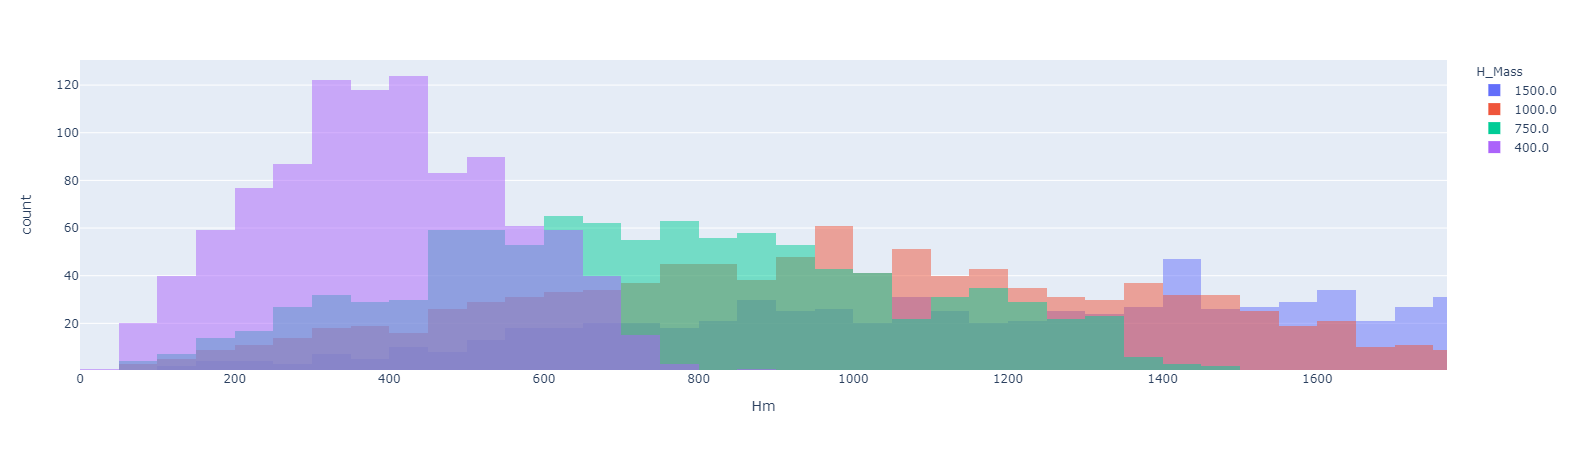

In [4]:
px.histogram(events, x='Hm', color='H_Mass', barmode='overlay')

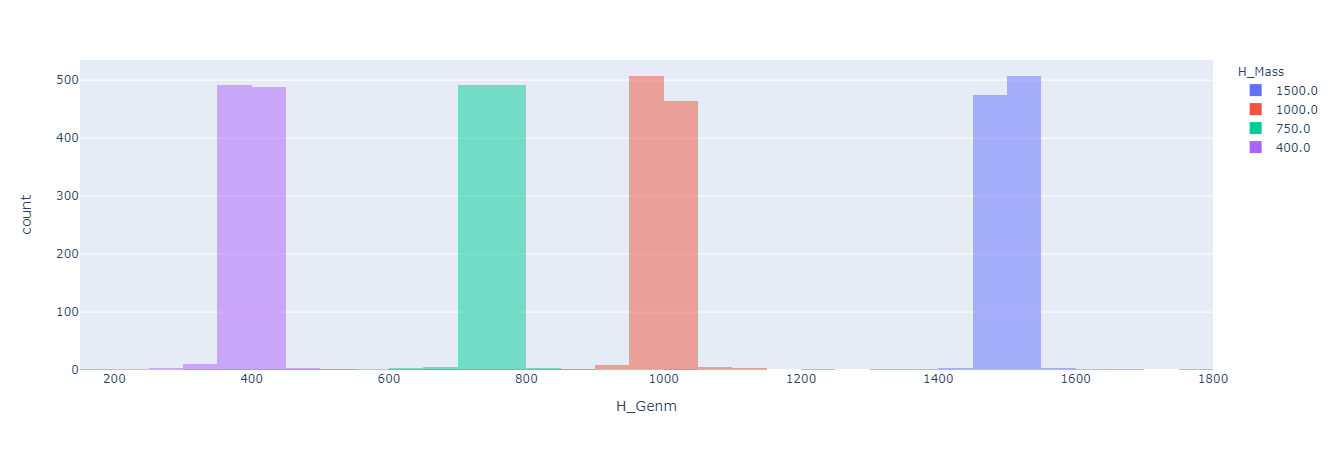

In [5]:
px.histogram(events, x='H_Genm', color='H_Mass', barmode='overlay')

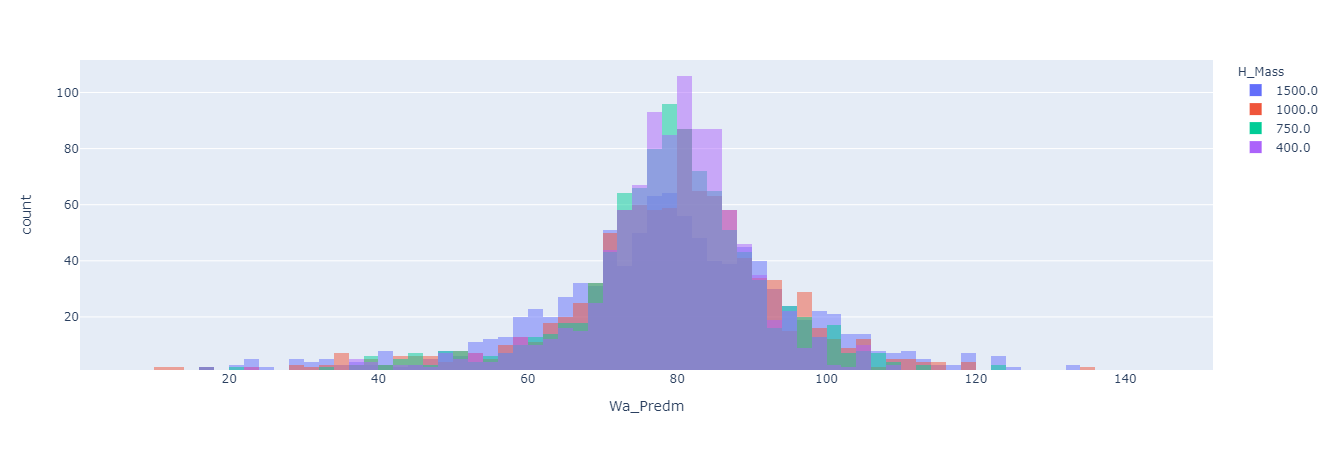

In [24]:
px.histogram(events, x='Wa_Predm', color='H_Mass', barmode='overlay')

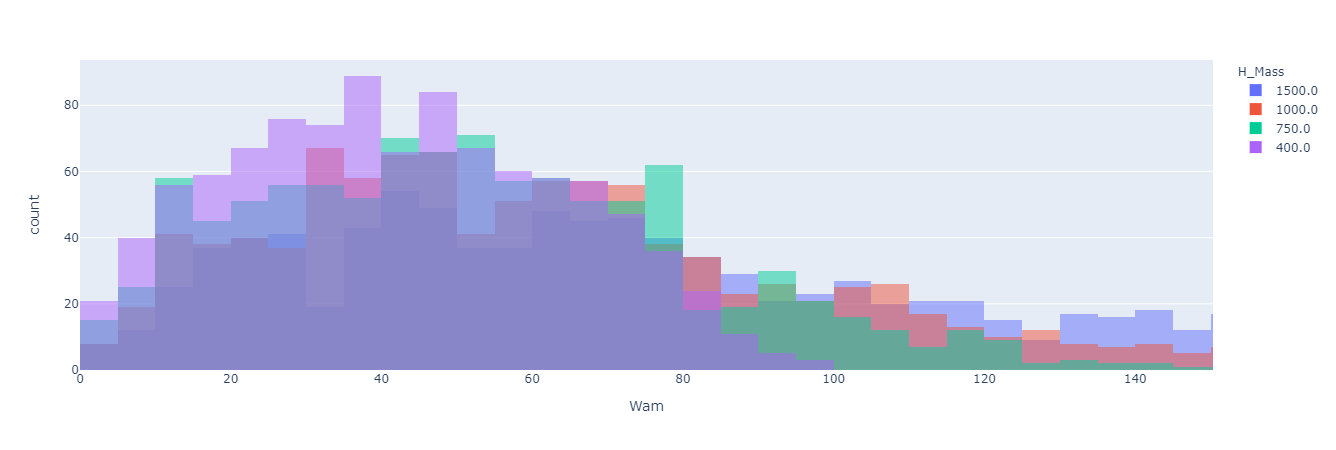

In [28]:
px.histogram(events, x='Wam', color='H_Mass', barmode='overlay')

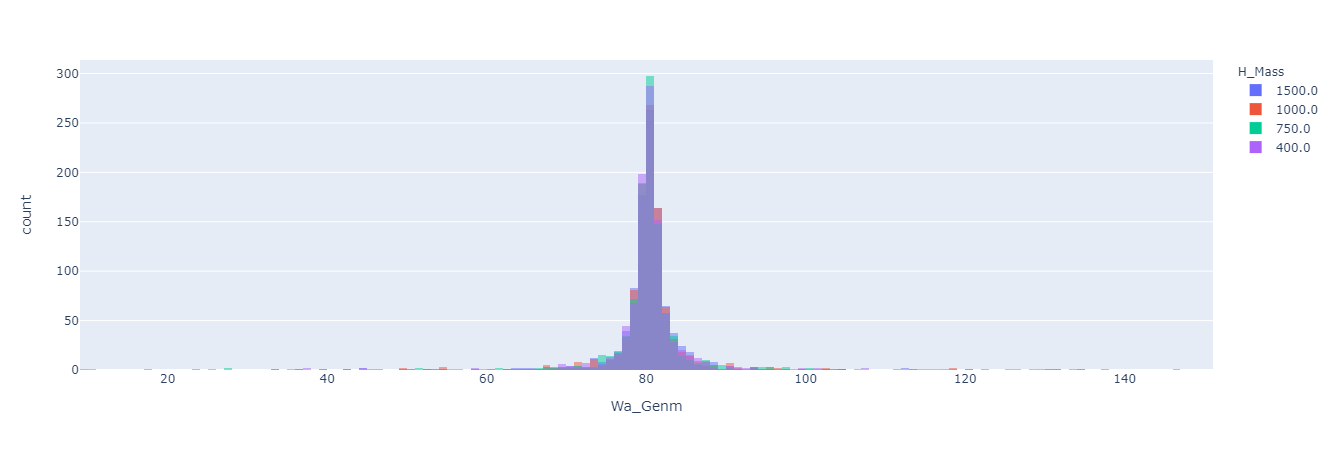

In [29]:
px.histogram(events, x='Wa_Genm', color='H_Mass', barmode='overlay')

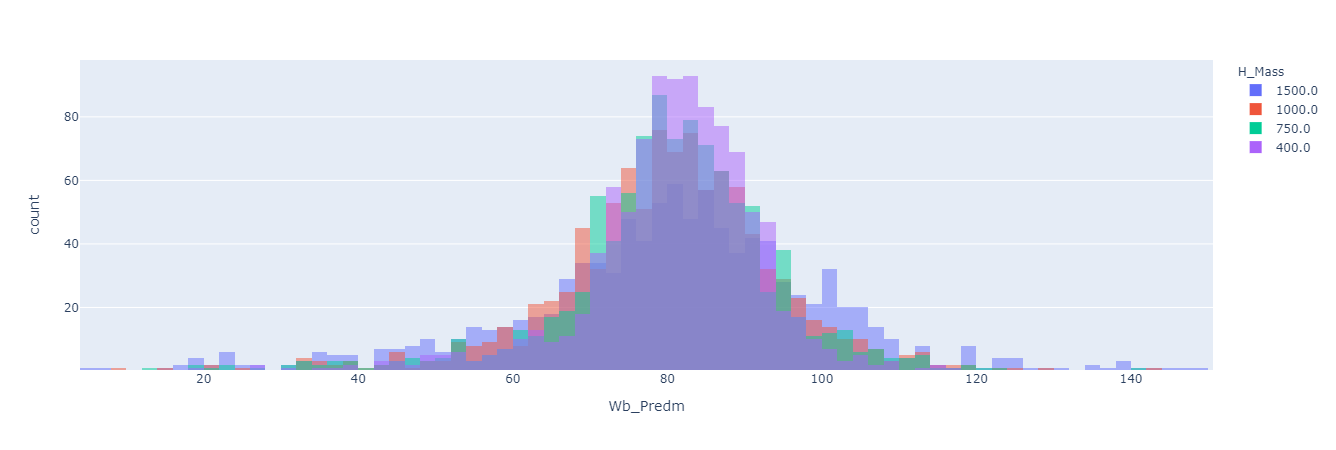

In [27]:
px.histogram(events, x='Wb_Predm', color='H_Mass', barmode='overlay')

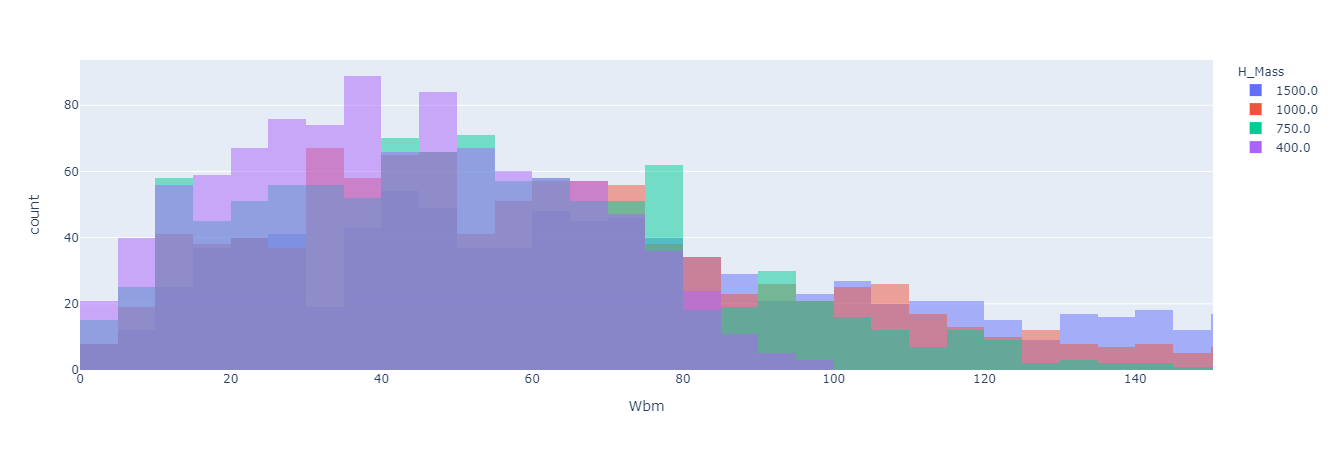

In [30]:
px.histogram(events, x='Wbm', color='H_Mass', barmode='overlay')

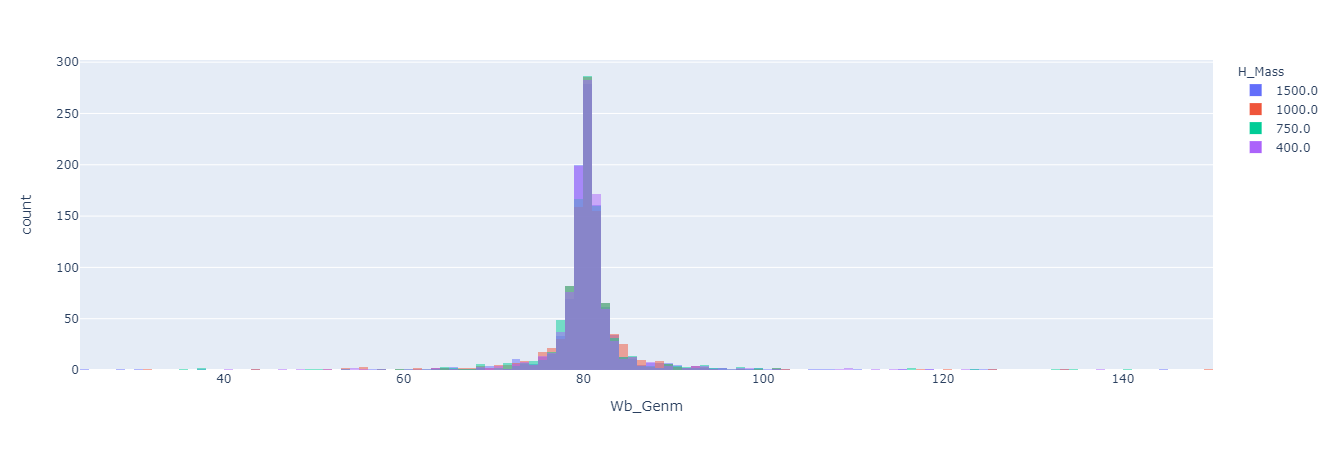

In [31]:
px.histogram(events, x='Wb_Genm', color='H_Mass', barmode='overlay')

In [6]:
new_df = pd.DataFrame()

In [7]:
source = ['gen']*events.shape[0] + ['pred']*events.shape[0] + ['reco']*events.shape[0]

In [8]:
new_df['source'] = source

In [9]:
new_df['Hm'] = pd.concat((events['H_Genm'], events['H_Predm'], events['Hm']), ignore_index=True)

In [10]:
new_df['Nax'] = pd.concat((events['Na_Genx'], events['Na_Predx'], events['Nax']), ignore_index=True)

In [11]:
new_df['model_mass'] = pd.concat((events['H_Mass'], events['H_Mass'], events['H_Mass']), ignore_index=True)

In [12]:
new_df

source           Hm         Nax  model_mass
0        gen  1494.697144  630.562378      1500.0
1        gen   998.202026  161.437393      1000.0
2        gen   995.416443    1.004041      1000.0
3        gen   751.042114  -33.297146       750.0
4        gen   999.761169   13.998293      1000.0
...      ...          ...         ...         ...
11995   reco   780.114258 -169.828003       750.0
11996   reco   651.717529  -47.567020       400.0
11997   reco   609.885986  -55.621975       400.0
11998   reco  1252.516235  157.286499      1000.0
11999   reco   855.225464   94.750443      1500.0

[12000 rows x 4 columns]

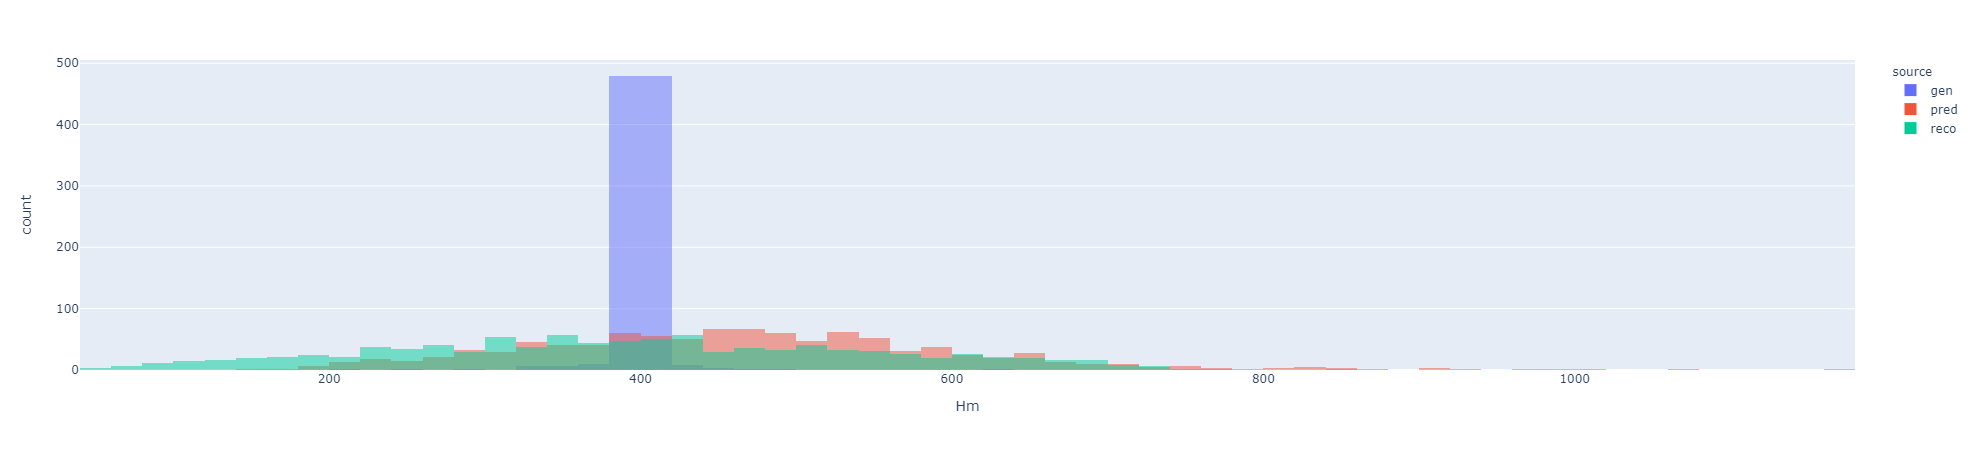

In [34]:
px.histogram(new_df[new_df['model_mass']==400], x='Hm', color='source', barmode='overlay')

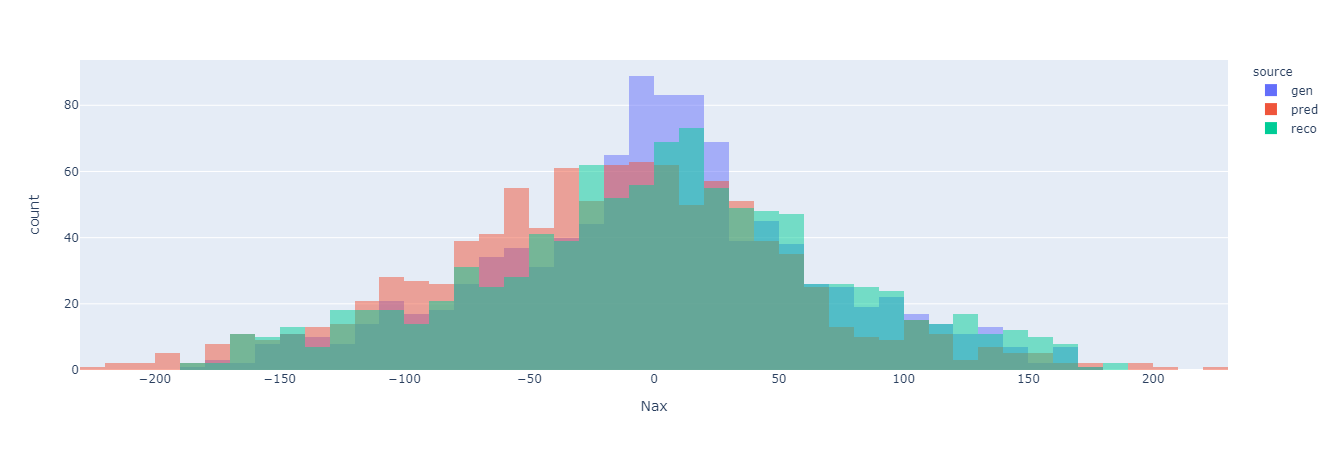

In [14]:
px.histogram(new_df[new_df['model_mass']==400], x='Nax', color='source', barmode='overlay')

In [15]:
diff_df = pd.DataFrame()

In [16]:
diff_df['pred'] = events['H_Predm'] - events['H_Genm']

In [17]:
diff_df['reco'] = events['Hm'] - events['H_Genm']

In [18]:
plot_diff_df = pd.DataFrame()

In [19]:
source = ['pred']*events.shape[0] + ['reco']*events.shape[0]

In [20]:
plot_diff_df['source'] = source

In [21]:
plot_diff_df['Hm'] = pd.concat((diff_df['pred'], diff_df['reco']), ignore_index=True)

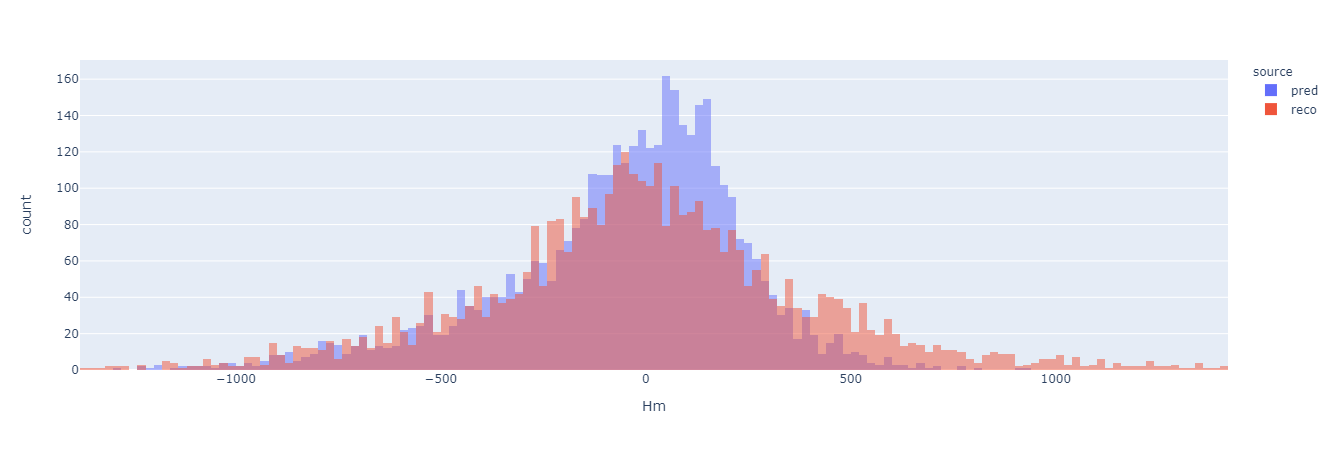

In [22]:
px.histogram(plot_diff_df, x='Hm', color='source', barmode='overlay')